# Project: Wrangling and Analyzing Data
by Joyce Afolabi
## Table of Contents
<ul>
    <li><a href="#introduction">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#gathering">Data Gathering</a></li>
    <li><a href="#assessing">Data Assessing</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#analysis">Storing, Analyzing and Visualizing </a></li>
</ul>

<a id='introduction'></a>
## Introduction

> I'm going to collect and examine data regarding the Twitter account <a href = "https://twitter.com/dog_rates?lang=de">"WeRateDogs"</a>. for the following project.
Data is obtained for that purpose by manual download, programmatic download, and via an API.
Thereafter, I'll analyze this data, specify the problems I discovered throughout my analysis, and fix those problems to provide a cleaned master data frame.

In [1]:
### Import the necessary libraries
import requests 
import json
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tweepy 
from functools import reduce
import re #text processing
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

<a id='wrangling'></a>
# Data Wrangling

<a id='gathering'></a>
## 1 - Data Gathering
> **The data for this project will be gotten from 3 different sources:**<br>
    1. The `twitter_archive_enhanced.csv` file provided by Udacity.<br>
    2. The tweet image predictions `image_predictions.tsv` file which will be downloaded programmatically via a url provided by Udacity.<br>
    3. Twitter API to gather retweet count and favorite count.<br>

#### 1. WeRateDogs™ Twitter Archive (twitter-archive-enhanced.csv)

Download data and store in a pandas dataframe

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 2. Tweet image predictions (image_predictions.tsv)

Image prediction data will be scraped from a url using the python request library

In [3]:
# read file using pandas and set the delimeter as tab
image_predictions = pd.read_csv("image_predictions.tsv", sep="\t")


image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Getting Additional Twitter data

* A Twitter developer account must be setup for the task in order to access to the Twitter API.  
* I'll use the Udacity data that is already available.


In [4]:
# #keys and token to access the API
# consumer_key = 'EMPTIED'
# consumer_secret = 'EMPTIED'
# access_token = 'EMPTIED'
# access_secret = 'EMPTIED'

# #access the API
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
# #get all the twitter ids in the df
# twitter_ids = list(df_twitter.tweet_id.unique())

# #save the gathered data to a file
# with open("tweet_json.txt", "w") as file:
#     for ids in twitter_ids:
#         print(f"Gather id: {ids}")
#         try:
#             #get all the twitter status - extended mode gives us additional data
#             tweet = api.get_status(ids, tweet_mode = "extended")
#             #dump the json data to our file
#             json.dump(tweet._json, file)
#             #add a linebreak after each dump
#             file.write('\n')
#         except Exception as e:
#             print(f"Error - id: {ids}" + str(e))
            

* Now that we have all the information required to create a dataframe, we can read it into a dictionary. 

In [6]:
#Extracting retweet columns like retweet count and favorite count and then importing it into a pandas DataFrame
tweet_list = []

with open('tweet_json.txt', encoding='utf-8') as f:
    for line in f.readlines():
        tweet_line = json.loads(line)
        tweet_id = tweet_line['id']
        retweet_count = tweet_line['retweet_count']
        favorite_count = tweet_line['favorite_count']
        tweet_list.append({'tweet_id': tweet_id,
                           'retweet_count': retweet_count,
                           'favorite_count': favorite_count,
                           'followers_count': tweet_line['user']['followers_count']})
tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])
tweet_json.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


<a id='assessing'></a>

## 2 - Assessing Data

- For top prediction, only 2075 images have been labeled as dog images.
- The dataset has 2075 entries, but the twitter archive dataset contains 2356 entries.
- Dog breeds differ in case formatting and contain underscores.
- The names of the columns are unclear and do not provide much context for the material.
- Delete columns that won't be used for analysis.
- we have 639 expanded urls which contain more than one url address.
- 66 duplicate jpg urls were discovered.
- The timestamp has an incorrect datatype - is an object, should be DateTime.
- float ratings have been incorrectly read from the text of tweet.

#### Tidiness

- some dogs have more than one category assigned.
- Dataset from Image prediction and Twitter API data should be combined to Twitter Archive dataset.
- Dog 'stage' classification (doggo, floofer, pupper or puppo) should be one column.


### Twitter_Archive 

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
# find missing value and calculate the percentage of data missing in the column
missing_percent = twitter_archive.isnull().sum() * 100 / len(twitter_archive)

missing_percent.sort_values(ascending=False)

in_reply_to_user_id           96.689304
in_reply_to_status_id         96.689304
retweeted_status_timestamp    92.317487
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
expanded_urls                  2.504244
rating_denominator             0.000000
pupper                         0.000000
floofer                        0.000000
doggo                          0.000000
name                           0.000000
tweet_id                       0.000000
rating_numerator               0.000000
text                           0.000000
source                         0.000000
timestamp                      0.000000
puppo                          0.000000
dtype: float64

__Note:__
>From the analysis (in_reply and retweeted_status) data has alot of missing values, therefore making the columns irrelevant to our analysis.

In [9]:
# check if dogs have multiple categories
dog_cat = ['doggo', 'floofer', 'pupper', 'puppo']

for dog in dog_cat:
    twitter_archive[dog] = twitter_archive[dog].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,dog_cat].sum(axis = 1)

In [10]:
# dogs categories
twitter_archive['number_categories'].value_counts()

0    1976
1     366
2      14
Name: number_categories, dtype: int64

In [11]:
# Analysis on the rating numerator and denominator
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### image_predictions analysis

In [13]:
# display sample of data
image_predictions.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1844,838916489579200512,https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg,2,web_site,0.993651,False,monitor,0.001406,False,envelope,0.001093,False
1001,708738143638450176,https://pbs.twimg.com/media/CdXxlFPWwAABaOv.jpg,1,Pomeranian,0.933457,True,Samoyed,0.057221,True,West_Highland_white_terrier,0.000904,True
915,701214700881756160,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True
411,673906403526995968,https://pbs.twimg.com/media/CVoySqoWUAAWb7N.jpg,1,toilet_seat,0.683319,False,soft-coated_wheaten_terrier,0.048928,True,Siberian_husky,0.030386,True
1124,727286334147182592,https://pbs.twimg.com/media/ChfXDrGUkAEAtF-.jpg,1,bonnet,0.146440,False,sock,0.083091,False,Chihuahua,0.070554,True
336,672222792075620352,https://pbs.twimg.com/media/CVQ3EDdWIAINyhM.jpg,1,beagle,0.958178,True,basset,0.009117,True,Italian_greyhound,0.007731,True


In [14]:
# Check for duplicate values
duplicate_img = image_predictions.duplicated().sum()
duplicate_img

0

In [15]:
# Check jpg_url for duplicates
sum(image_predictions.jpg_url.duplicated())

66

* The Image Prediction Table dataset does not contain any matching duplicates, however when each column is assessed, you will discover that the 'jpg url' column lacks values. 

In [16]:
# check jpg_url to confirm if it contains only jpg and png images
image_predictions[~image_predictions.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Twitter API data

In [18]:
tweet_json.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


<a id='cleaning'></a>

## 3 - Cleaning Data


* Change datatype for tweet_id and timestamp
* drop column with huge missing data percentage
* Source column is in HTML-formatted string, not a normal string
* twitter api table columns(retweet_count, favorite_count, followers_count) should be added to twitter archive table.
* Image predictions table should be added to twitter archive table
* doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "dog_stage"

In [19]:
# Create a copy of the original data
archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
tweet_clean =  tweet_json.copy()

In [20]:
# In our master data frame, we only want the rows with empty "retweeted status id" columns.
archive_clean = archive_clean[archive_clean["retweeted_status_id"].isnull()]

In [21]:
# For the retweets, we only want the rows without an entry in "in_reply_to_status_id"
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

In [22]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,0,0,0,0,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,0,0,0,0,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,0,0,0,0,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,0,0,0,0,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,0,0,0,0,0


#### Define 

* Drop the unnecessary columns 

#### Code 

In [23]:
#drop columns
null_cols =['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls']
archive_clean = archive_clean.drop(null_cols, 1)

C:\Users\user\AppData\Local\Temp\ipykernel_8640\788639751.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  archive_clean = archive_clean.drop(null_cols, 1)


#### Test

In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   int64 
 8   floofer             2097 non-null   int64 
 9   pupper              2097 non-null   int64 
 10  puppo               2097 non-null   int64 
 11  number_categories   2097 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 213.0+ KB


#### Define 

* Fix wrong datatype

#### Code 

In [25]:
# Convert tweet_id to str from twitter_archive, image_prediction, twitter_data tables.
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)

# convert timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# convert source to category datatype
archive_clean.source = archive_clean.source.astype("category")

#### Test

In [26]:
archive_clean.info(
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   int64              
 8   floofer             2097 non-null   int64              
 9   pupper              2097 non-null   int64              
 10  puppo               2097 non-null   int64              
 11  number_categories   2097 non-null   int64              
dtypes: category(1), datetime64[ns, UTC

#### Define:

* Incorrect dog names


#### Code

In [27]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [28]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

C:\Users\user\AppData\Local\Temp\ipykernel_8640\1525449282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'


#### Test

In [29]:
# check changes
archive_clean.name.value_counts()

None          707
Lucy           11
Charlie        11
Oliver         10
Cooper         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 930, dtype: int64

#### Define

* Doggo, floofer, pupper, or puppo should all be categorized as dogs in a single column.
* There are multiple categories for certain dogs.


#### Code

In [30]:
# display sample of dataframe
archive_clean.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,0,0,0,0,0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,0,0,0,0,0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,0,0,0,0,0


In [31]:
# read dog types
for index, column in archive_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(archive_clean.loc[index, 'text']).lower():
            archive_clean.loc[index, 'dog_type'] = word.title()
            
# drop previous columns
archive_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)

#### Test

In [32]:
#sample of cleaned data
archive_clean.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,number_categories,dog_type
225,849051919805034497,2017-04-04 00:12:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. Kevin doesn't give a single h*c...,13,10,Kevin,0,NaN
2320,666437273139982337,2015-11-17 02:06:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a lone northeastern Cumberbatch. H...,7,10,None,0,NaN
405,823939628516474880,2017-01-24 17:04:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cash. He's officially given pup on tod...,12,10,Cash,0,NaN


In [33]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   number_categories   2097 non-null   int64              
 8   dog_type            374 non-null    object             
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 214.2+ KB


#### Test

In [34]:
# display fixed data
archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,number_categories,dog_type
1704,680889648562991104,2015-12-26 23:15:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheesy. It's her birthday. She's patie...,9,10,Cheesy,0,NaN
497,813142292504645637,2016-12-25 22:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Everybody stop what you're doing and look at t...,13,10,None,0,NaN
2136,670055038660800512,2015-11-27 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,3,10,Tommy,0,NaN
2350,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,10,10,None,0,NaN
352,831315979191906304,2017-02-14 01:35:49+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I couldn't make it to the #WKCDogShow BUT I ha...,13,10,None,1,Pupper


#### Define

* The timestamp has an incorrect datatype - should be datetime


#### Code

In [35]:
# convert to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [36]:
# display dataset types
archive_clean.shape

(2097, 9)

#### Define
Float ratings have been incorrectly read from the text of tweet.

#### Code

In [37]:
# save index of tweets with denominator greater than 10
high_denum = archive_clean[archive_clean.rating_denominator > 10].index

# display sample of data with denominator greater than 10
archive_clean.loc[high_denum,:][['text','rating_denominator', 'rating_numerator']].sample(5)

,text,rating_denominator,rating_numerator
1662,This is Darrel. He just robbed a 7/11 and is i...,11,7
1351,Here is a whole flock of puppers. 60/50 I'll ...,50,60
1228,Happy Saturday here's 9 puppers on a bench. 99...,90,99
1120,Say hello to this unbelievably well behaved sq...,170,204
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,120,144


In [38]:
# fix rating manually for tweets for which rating was read incorrectly
archive_clean.loc[832088576586297345, 'rating_denominator'] = 0
archive_clean.loc[832088576586297345, 'rating_numerator'] = 0

archive_clean.loc[775096608509886464, 'rating_denominator'] = 10
archive_clean.loc[775096608509886464, 'rating_numerator'] = 14

archive_clean.loc[740373189193256964, 'rating_denominator'] = 10
archive_clean.loc[740373189193256964, 'rating_numerator'] = 14

archive_clean.loc[722974582966214656, 'rating_denominator'] = 10
archive_clean.loc[722974582966214656, 'rating_numerator'] = 13

archive_clean.loc[716439118184652801, 'rating_denominator'] = 10
archive_clean.loc[716439118184652801, 'rating_numerator'] = 11

archive_clean.loc[682962037429899265, 'rating_denominator'] = 10
archive_clean.loc[682962037429899265, 'rating_numerator'] = 10

In [39]:
# display sample of cleaned rating
archive_clean.loc[high_denum,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
1202,This is Bluebert. He just saw that both #Final...,50.0,50.0
1662,This is Darrel. He just robbed a 7/11 and is i...,11.0,7.0
1635,Someone help the girl is being mugged. Several...,110.0,121.0


In [40]:
# add normalized rating
archive_clean['rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

#### Test

In [41]:
# display sample of data with the new column
archive_clean[['text','rating_denominator', 'rating_numerator', 'rating']].sample(5)

,text,rating_denominator,rating_numerator,rating
762,Evolution of a pupper yawn featuring Max. 12/1...,10.0,12.0,1.2
517,This is Hunter. He just found out he needs bra...,10.0,11.0,1.1
1488,Please only send in dogs. Don't submit other t...,10.0,9.0,0.9
1240,Say hello to Olive and Ruby. They are best bud...,10.0,11.0,1.1
2218,This is a Birmingham Quagmire named Chuk. Love...,10.0,10.0,1.0


#### Define

There are 59 expanded URLs that are missing and 639 expanded URLs that contain multiple URL addresses - build correct links by using tweet id.


#### Code

In [42]:
# fix expanded urls
for index, column in archive_clean.iterrows():
    archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    
# Test
archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,expanded_urls
2177,669037058363662336,2015-11-24 06:17:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,10.0,10.0,None,0.0,NaN,1.0,https://twitter.com/dog_rates/status/2177
1657,683142553609318400,2016-01-02 04:27:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brandy. She's a member of the Bloods. Men...,9.0,10.0,Brandy,1.0,Pupper,0.9,https://twitter.com/dog_rates/status/1657
817,770772759874076672,2016-08-30 23:58:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,11.0,10.0,Sebastian,0.0,NaN,1.1,https://twitter.com/dog_rates/status/817
539,806576416489959424,2016-12-07 19:09:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Hooman catch successful. Massive hit by dog. F...,13.0,10.0,None,0.0,NaN,1.3,https://twitter.com/dog_rates/status/539
1971,673270968295534593,2015-12-05 22:41:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mac. His dad's probably a lawyer. 11/1...,11.0,10.0,Mac,0.0,NaN,1.1,https://twitter.com/dog_rates/status/1971


#### Define

* Fix data datatype

#### Code

In [43]:
# Convert tweet_id to str from twitter_archive, image_prediction, twitter_data tables.
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
tweet_clean.tweet_id = tweet_clean.tweet_id.astype(str)

# convert timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# convert source to category datatype
archive_clean.source = archive_clean.source.astype("category")

#### Test

In [44]:
#confirm changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 0 to 682962037429899265
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2103 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   rating_numerator    2103 non-null   float64            
 5   rating_denominator  2103 non-null   float64            
 6   name                2097 non-null   object             
 7   number_categories   2097 non-null   float64            
 8   dog_type            374 non-null    object             
 9   rating              2102 non-null   float64            
 10  expanded_urls       2103 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 247.5

 #### Define
 
* Source column is in HTML-formatted string, not a normal string


#### Code

In [45]:
#extract values
archive_clean.source = archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [46]:
 #confirm changes
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Cleaning image_prediction data

#### Define

Drop duplicate data in the image_url column

#### Code

In [47]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1283,750429297815552001,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False
133,668480044826800133,https://pbs.twimg.com/media/CUbrDWOWcAEyMdM.jpg,1,Arctic_fox,0.119243,False,Labrador_retriever,0.099965,True,pug,0.086717,True
1046,713175907180089344,https://pbs.twimg.com/media/CeW1tERWAAAA9Q2.jpg,1,timber_wolf,0.503788,False,malamute,0.430624,True,Siberian_husky,0.028454,True
496,675781562965868544,https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg,1,Maltese_dog,0.921968,True,West_Highland_white_terrier,0.017811,True,toy_poodle,0.013555,True


In [48]:
# count the total duplicate values
image_clean.jpg_url.duplicated().sum()

66

In [49]:
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [50]:
image_clean.jpg_url.duplicated().sum()

0

**Define**

- Unclear column names - change column names to more descriptive ones.


**Code**

In [51]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1401,768855141948723200,https://pbs.twimg.com/media/CquFrCKWAAAr32m.jpg,1,chow,0.720219,True,Brabancon_griffon,0.058365,True,Rottweiler,0.055113,True
199,669661792646373376,https://pbs.twimg.com/media/CUsd2TfWwAAmdjb.jpg,1,weasel,0.262802,False,Siamese_cat,0.148263,False,hamster,0.116374,False
1395,767754930266464257,https://pbs.twimg.com/media/CqedCQWWgAIab9L.jpg,1,vizsla,0.307794,True,fountain,0.142185,False,Chesapeake_Bay_retriever,0.113903,True
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True
228,670385711116361728,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,1,whippet,0.178027,True,Chesapeake_Bay_retriever,0.105969,True,beagle,0.078720,True


In [52]:
image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [53]:
# clean column names
image_clean.columns = ['tweet_id',
                                  'image_url', 
                            'img_number', 
                            '1st_pred',
                            '1st_pred_conf',
                            '1st_pred_isdog',
                            '2nd_pred',
                            '2nd_pred_conf',
                            '2nd_pred_isdog',
                            '3rd_pred',
                            '3rd_pred_conf',
                            '3rd_pred_isdog']

In [54]:
image_clean.columns

Index(['tweet_id', 'image_url', 'img_number', '1st_pred', '1st_pred_conf',
       '1st_pred_isdog', '2nd_pred', '2nd_pred_conf', '2nd_pred_isdog',
       '3rd_pred', '3rd_pred_conf', '3rd_pred_isdog'],
      dtype='object')

#### Define

Dog breeds contain underscores in their names, and contain different case formatting

* Replace underscores with whitespace
* Capitalize the first letter of each word

#### Code

In [55]:
image_clean.head()

,tweet_id,image_url,img_number,1st_pred,1st_pred_conf,1st_pred_isdog,2nd_pred,2nd_pred_conf,2nd_pred_isdog,3rd_pred,3rd_pred_conf,3rd_pred_isdog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [56]:
breed_pred = ['1st_pred', '2nd_pred', '3rd_pred']

# remove underscores and capitalize the first letter of each word 
for breed in breed_pred:
    image_clean[breed] = image_clean[breed].str.replace('_', ' ').str.title()

#### Test

In [57]:
image_clean[breed_pred].sample(5)

,1st_pred,2nd_pred,3rd_pred
225,Cairn,West Highland White Terrier,Miniature Schnauzer
650,Labrador Retriever,Golden Retriever,Beagle
1031,Pembroke,Cardigan,Basenji
1364,Brown Bear,Indian Elephant,Water Buffalo
876,Italian Greyhound,Basset,Staffordshire Bullterrier


#### Define

* Only 2075 photos have been identified as dogs for the top prediction; if the first prediction does not identify a dog breed, utilize the second or third prediction.

#### Code

In [58]:
""" 
    This function will repeatedly iterate over the data frame in the absence of a dog breed.
    If found, the row's return value is NaN. 
"""

def get_breed(row):
    if row['1st_pred_isdog'] == True:
        return row['1st_pred'], row['1st_pred_conf']
    if row['2nd_pred_isdog'] == True:
        return row['2nd_pred'], row['2nd_pred_conf']
    if row['3rd_pred_isdog'] == True:
        return row['3rd_pred'], row['3rd_pred_conf']
    return np.nan, np.nan

In [59]:
# apply function to dataset
# create new columns with data
image_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(image_clean.apply(lambda row: get_breed(row), axis = 1).tolist(), index = image_clean.index) 



In [60]:
# drop old columns
image_clean.drop(['1st_pred',
                       '1st_pred_conf',
                       '1st_pred_isdog',
                       '2nd_pred',
                       '2nd_pred_conf',
                       '2nd_pred_isdog',
                       '3rd_pred',
                       '3rd_pred_conf',
                       '3rd_pred_isdog'],
                      axis=1, inplace=True)


In [61]:
# drop rows without dog breed prediction
image_clean.dropna(subset = ['breed_predicted', 'prediction_confidence'], inplace = True)

In [62]:
image_clean.head()

,tweet_id,image_url,img_number,breed_predicted,prediction_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311


<a id="analysis"> </a>

### Storing, Analyzing and Visualizing Data

### Storing

Merge the three (3) cleaned dataset into one csv file with the name **twitter_archive_master.csv**

In [63]:
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [archive_clean, image_clean, tweet_clean])

In [64]:

df.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,expanded_urls,image_url,img_number,breed_predicted,prediction_confidence,retweet_count,favorite_count,followers_count
1083,684222868335505415,2016-01-05 04:00:18+00:00,Twitter for iPhone,Someone help the girl is being mugged. Several...,121.0,110.0,None,0.0,Pupper,1.1,https://twitter.com/dog_rates/status/1635,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,Soft-Coated Wheaten Terrier,0.791182,1563,4225,3200952
61,877201837425926144,2017-06-20 16:29:50+00:00,Twitter for iPhone,This is Nelly. He graduated with his dogtorate...,12.0,10.0,Nelly,0.0,NaN,1.2,https://twitter.com/dog_rates/status/81,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,1,Pembroke,0.931120,5880,27755,3200892
1344,672604026190569472,2015-12-04 02:31:10+00:00,Twitter for iPhone,This is a baby Rand Paul. Curls for days. 11/1...,11.0,10.0,None,0.0,NaN,1.1,https://twitter.com/dog_rates/status/1994,https://pbs.twimg.com/media/CVWRyylWIAAMltv.jpg,1,Toy Poodle,0.820158,445,1188,3201005
11,889665388333682689,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,13.0,10.0,None,1.0,Puppo,1.3,https://twitter.com/dog_rates/status/12,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,8538,38818,3200889
1320,673580926094458881,2015-12-06 19:13:01+00:00,Twitter for iPhone,When you ask your professor about extra credit...,8.0,10.0,None,0.0,NaN,0.8,https://twitter.com/dog_rates/status/1958,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,Beagle,0.985062,297,882,3201004


In [65]:
# Store data in a csv file
df.to_csv('twitter_archive_master.csv', index=False)

#### Analysis and visualization

In [66]:
# load the master twitter data for further analysis
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')


In [67]:
# re-confirm the datatype of the columns
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1606 non-null   int64  
 1   timestamp              1606 non-null   object 
 2   source                 1606 non-null   object 
 3   text                   1606 non-null   object 
 4   rating_numerator       1606 non-null   float64
 5   rating_denominator     1606 non-null   float64
 6   name                   1606 non-null   object 
 7   number_categories      1606 non-null   float64
 8   dog_type               275 non-null    object 
 9   rating                 1606 non-null   float64
 10  expanded_urls          1606 non-null   object 
 11  image_url              1606 non-null   object 
 12  img_number             1606 non-null   int64  
 13  breed_predicted        1606 non-null   object 
 14  prediction_confidence  1606 non-null   float64
 15  retw

In [68]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,expanded_urls,image_url,img_number,breed_predicted,prediction_confidence,retweet_count,favorite_count,followers_count
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,0.0,NaN,1.3,https://twitter.com/dog_rates/status/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819,3200889
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,0.0,NaN,1.2,https://twitter.com/dog_rates/status/2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461,3200889
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,0.0,NaN,1.3,https://twitter.com/dog_rates/status/3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908,3200889
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,0.0,NaN,1.2,https://twitter.com/dog_rates/status/4,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048,3200889
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,0.0,NaN,1.3,https://twitter.com/dog_rates/status/5,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,3261,20562,3200889


In [69]:
# convert to the new twitter_archive_master timestap column to  datetime
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

### Question 1: What Twitter source is the most used?

In [70]:
twitter_source  = twitter_archive_master['source'].value_counts()
twitter_source

Twitter for iPhone    1577
Twitter Web Client      20
TweetDeck                9
Name: source, dtype: int64

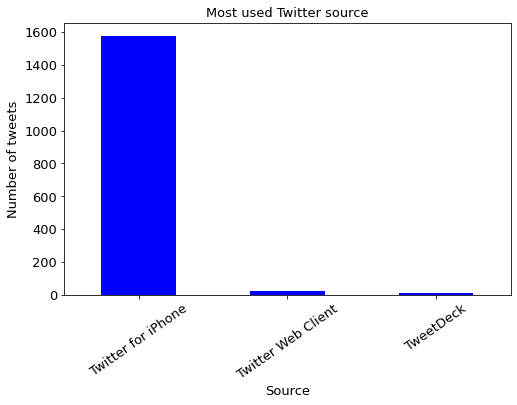

In [71]:
plot_source = twitter_source.plot.bar(color = 'blue', fontsize = 13)
plot_source.figure.set_size_inches(8, 5);

plt.title('Most used Twitter source', color = 'black', fontsize = '13')
plt.xlabel('Source', color = 'black', fontsize = '13')
plt.ylabel('Number of tweets', color = 'black', fontsize = '13')
plt.xticks(rotation = 35);

#### Interpretation:
>From the chart above, it can be concluded that the majority of people that tweet make use of iPhones.

### Question 2: What is the most common dog breed

In [72]:
twitter_archive_master['breed_predicted'].value_counts()

Golden Retriever      141
Labrador Retriever    101
Pembroke               93
Chihuahua              86
Pug                    60
                     ... 
Scotch Terrier          1
Entlebucher             1
Japanese Spaniel        1
Standard Schnauzer      1
Irish Wolfhound         1
Name: breed_predicted, Length: 113, dtype: int64

In [73]:
# horizontal bar plot function
def plot_bar(x, y, title="", xlabel="", ylabel=""):
    
    plt.figure(figsize=(8,5)) 

    plt.xticks(rotation = 35)
    
    bar_list = plt.bar(x,y, edgecolor="k")


    plt.title(title,
              fontsize=17)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

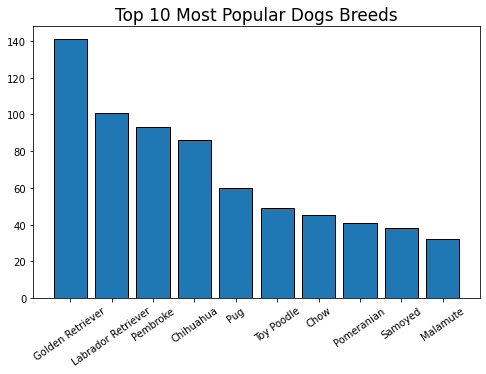

In [74]:
# plot 10 most popular dog breeds
dogbreeds = pd.DataFrame(twitter_archive_master.breed_predicted.value_counts()[:10])

plot_bar(dogbreeds.index,
          dogbreeds.breed_predicted,
          title="Top 10 Most Popular Dogs Breeds")

#### Interpretation:
>Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua are the most popular dog breeds!

### Question 3: WeRateDog Dog Types

In [75]:
twitter_type  = twitter_archive_master['dog_type'].value_counts()
twitter_type

Pupper     181
Doggo       61
Puppo       25
Floofer      8
Name: dog_type, dtype: int64

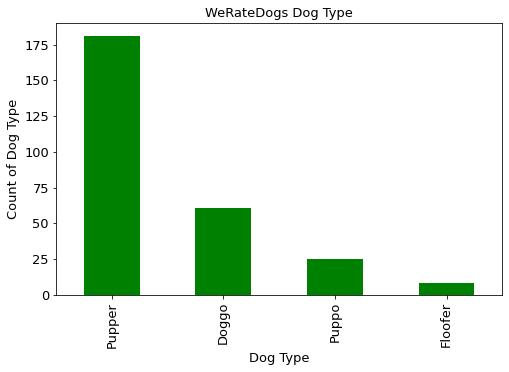

In [76]:
plot_type = twitter_type.plot.bar(color = 'green', fontsize = 13)
plot_type.figure.set_size_inches(8, 5);

plt.title('WeRateDogs Dog Type', color = 'black', fontsize = '13')
plt.xlabel('Dog Type', color = 'black', fontsize = '13')
plt.ylabel('Count of Dog Type', color = 'black', fontsize = '13');

In [77]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'number_categories', 'dog_type', 'rating',
       'expanded_urls'],
      dtype='object')

### Question 4: What is the comparison between Favourite Count and Retweet Count?

<Figure size 576x360 with 0 Axes>

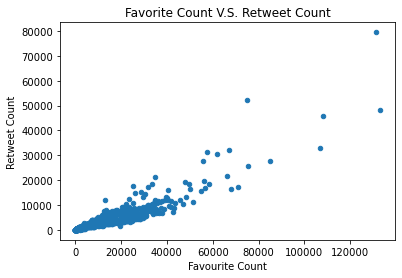

In [78]:
#Favorite count v.s. retweet count
plt.figure(figsize=(8,5))
twitter_archive_master.plot(kind='scatter', x='favorite_count', y='retweet_count').set_title('Favorite Count V.S. Retweet Count');
plt.ylabel('Retweet Count')
plt.xlabel('Favourite Count');

#### Interpretation:
>There is a positive correlation between favourite count and retweet count, because the higher the favourite count, the higher the retweet count, and vice versa.